In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and Merge Data
df1 = pd.read_csv("netflix_code.csv")
df1


,Country,Total Library Size,No. of TV Shows,No. of Movies,Basic,Cost Per Month - Standard ($),Cost Per Month - Premium ($),code
0,Argentina,4760,3154,1606,3.74,6.30,9.26,ARG
1,Australia,6114,4050,2064,7.84,12.12,16.39,AUS
2,Austria,5640,3779,1861,9.03,14.67,20.32,AUT
3,Belgium,4990,3374,1616,10.16,15.24,20.32,BEL
4,Bolivia,4991,3155,1836,7.99,10.99,13.99,BOL
...,...,...,...,...,...,...,...,...
60,Ukraine,5336,3261,2075,5.64,8.46,11.29,UKR
61,United Kingdom,6643,4551,2092,7.91,13.20,18.48,GBR
62,United States,5818,3826,1992,8.99,13.99,17.99,USA
63,Uruguay,4989,3154,1835,8.99,12.99,15.99,URY


In [36]:
graphName = ["Circular", "Bar", "Horizontal Bar",
             "Choropleth Map", "Word Cloud", "Lollipop", "Pie"]
result = pd.read_csv("surveyResult.csv")
conditions = [
    (result['visType'] == 0),
    (result['visType'] == 1),
    (result['visType'] == 2),
    (result['visType'] == 3),
    (result['visType'] == 4),
    (result['visType'] == 5),
    (result['visType'] == 6),
]
result["VisName"] = np.select(conditions, graphName)
result["Difference"] = (
    (result["guessed"] - result["actual"])/result["actual"]).abs()*100
result


,trialNum,visType,gender,knowledge,guessed,actual,VisName,Difference
0,1,5,female,knowable,13.10,12.345,Lollipop,6.115836
1,0,0,male,learn,12.92,12.176,Circular,6.110381
2,1,4,male,learn,10.77,11.159,Word Cloud,3.485975
3,0,6,male,learn,10.00,11.339,Pie,11.808801
4,24,0,male,learn,10.77,13.491,Circular,20.169002
...,...,...,...,...,...,...,...,...
663,65,1,female,not,11.62,11.932,Bar,2.614817
664,66,4,female,not,14.51,12.813,Word Cloud,13.244361
665,67,1,female,not,11.49,12.345,Bar,6.925881
666,68,4,female,not,8.86,10.254,Word Cloud,13.594695


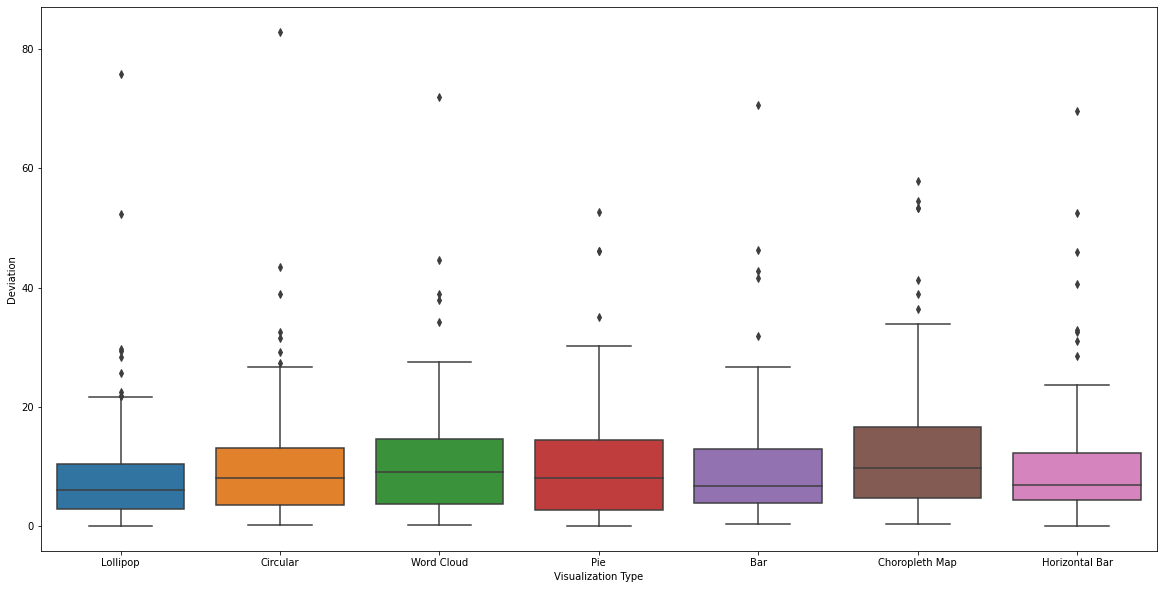

In [38]:
sns.boxplot(x="VisName", y="Difference", data=result)
plt.rcParams["figure.figsize"] = (20, 10)
plt.xlabel("Visualization Type")
plt.ylabel("Deviation")
plt.savefig("./img/Analysis1.png")


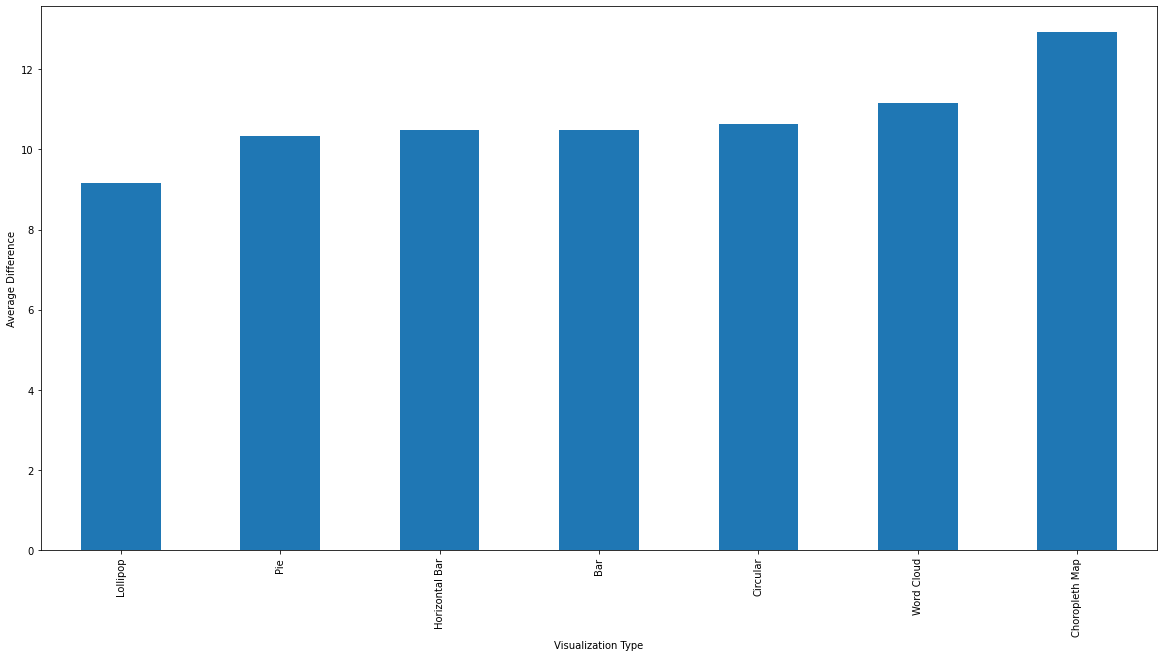

In [48]:
result.groupby('VisName')['Difference'].mean().sort_values().plot(kind="bar")
plt.xlabel("Visualization Type")
plt.ylabel("Average Difference")
plt.savefig("./img/Analysis2.png")